<a href="https://colab.research.google.com/github/Sakshi-Pingale/-LGMVIP-DataScience/blob/main/beginner_task_2(Iris_Flower).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Flowers Classification ML Project :

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#load the dataset
iris = pd.read_csv(r'/content/bezdekIris.data')

In [ ]:
iris.head(5)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
iris.tail(5)

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris.shape

(149, 5)

the dataset contains 149 rows and 5 columnc

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [ ]:
#inspecting missing values
iris.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [ ]:
iris.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.054362,3.773826,1.206040
std,0.828594,0.435810,1.760543,0.760354
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# The column names need to be changed from their default to match your initial structure
iris.columns = [5.1, 3.5, 1.4, 0.2, 'Iris-setosa']

# Rename the columns
iris.rename(columns={5.1: 'SepalLength', 3.5: 'SepalWidth', 1.4: 'PetalLength', 0.2: 'PetalWidth', 'Iris-setosa': 'Species'}, inplace=True)

# Display the updated DataFrame
print(iris.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0          4.9         3.0          1.4         0.2  Iris-setosa
1          4.7         3.2          1.3         0.2  Iris-setosa
2          4.6         3.1          1.5         0.2  Iris-setosa
3          5.0         3.6          1.4         0.2  Iris-setosa
4          5.4         3.9          1.7         0.4  Iris-setosa


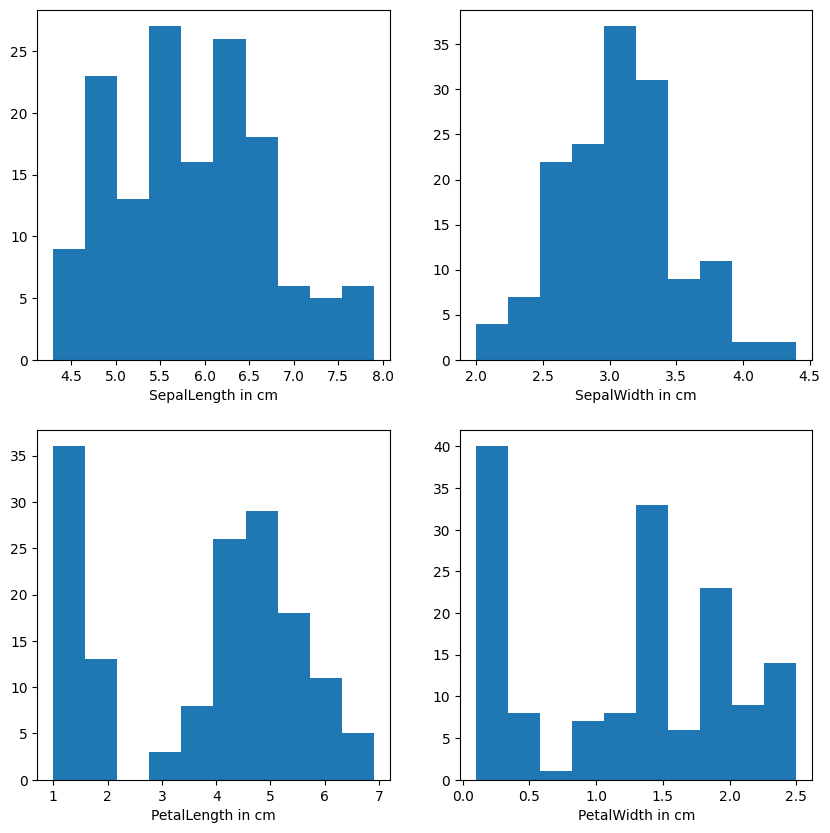

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(iris['SepalLength'])
ax1.set_xlabel('SepalLength in cm')

ax2.hist(iris['SepalWidth'])
ax2.set_xlabel('SepalWidth in cm')

ax3.hist(iris['PetalLength'])
ax3.set_xlabel('PetalLength in cm')

ax4.hist(iris['PetalWidth'])
ax4.set_xlabel('PetalWidth in cm')

fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

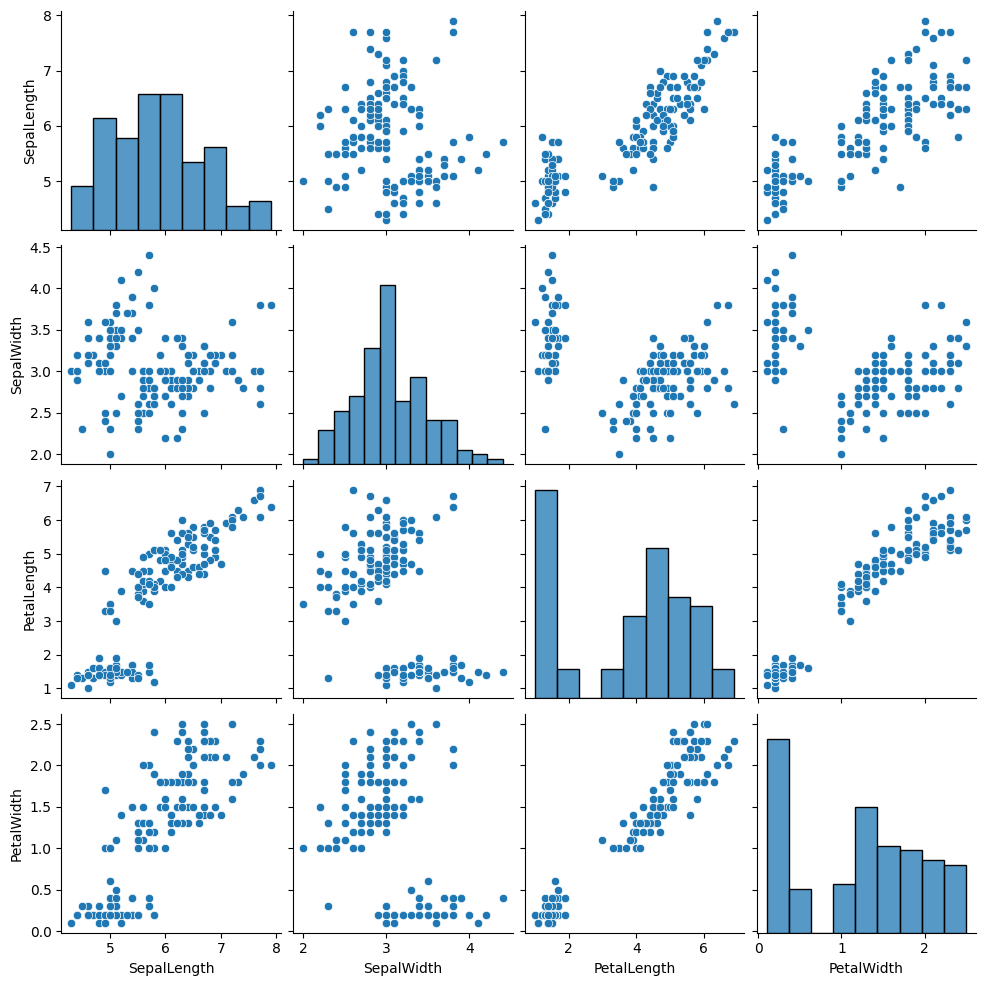

In [ ]:
sns.pairplot(data = iris, kind = 'scatter')
#these graphs gives detailed explanation how each columns are inter-releted

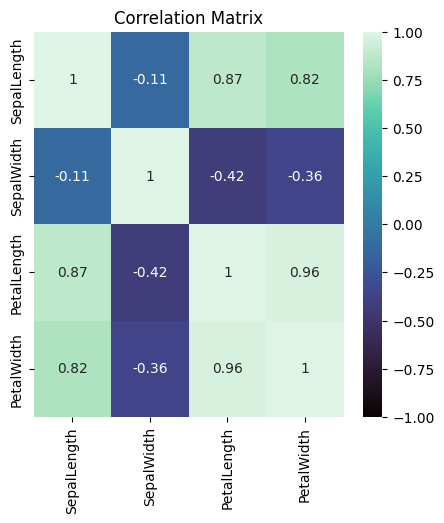

In [ ]:
# Exclude the 'Species' column from the correlation calculation
corr = iris.drop('Species', axis=1).corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title('Correlation Matrix')
plt.show()

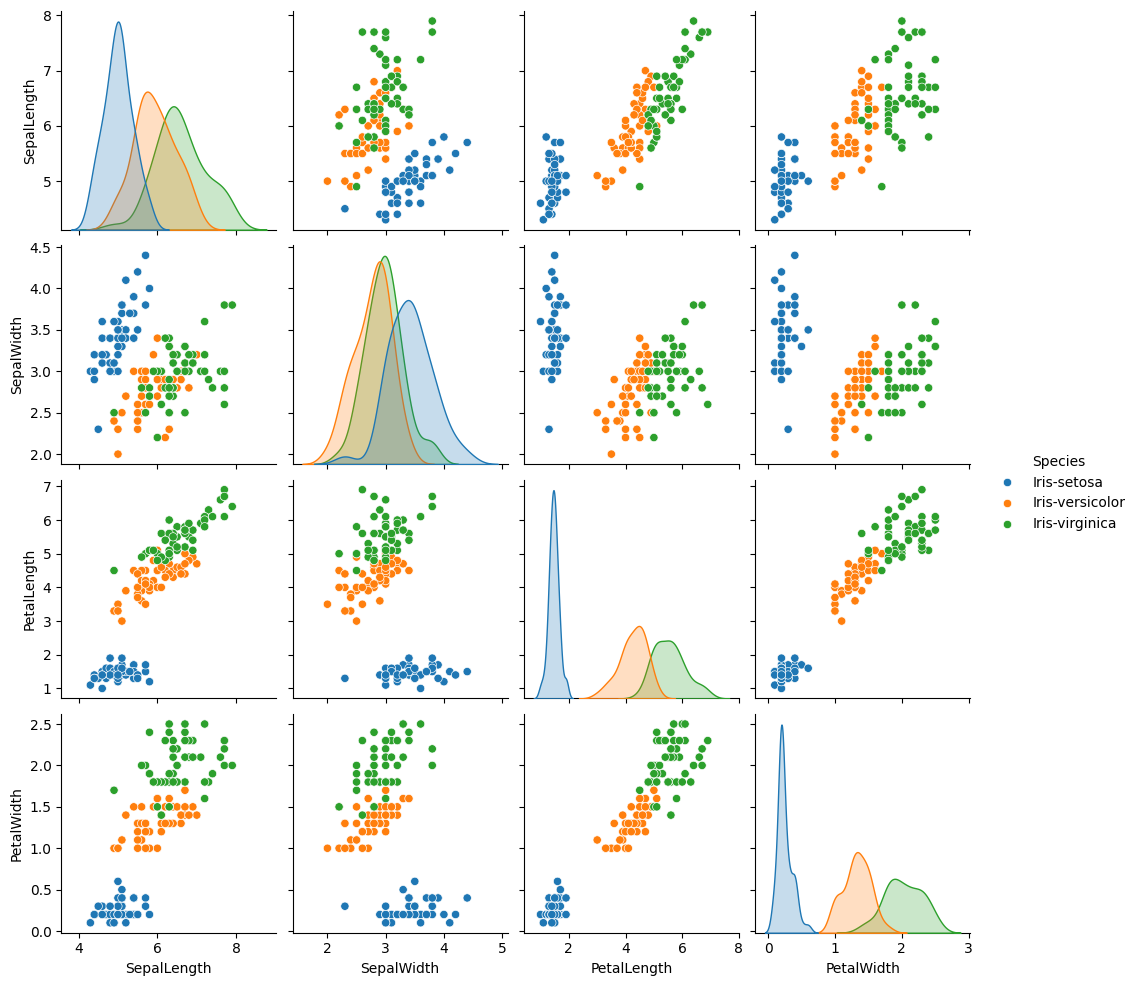

In [ ]:
sns.pairplot(data = iris, hue = 'Species')


In [ ]:
from sklearn.cluster import KMeans
LIST = []
x = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].to_numpy()

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  LIST.append(kmeans.inertia_)

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                  max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

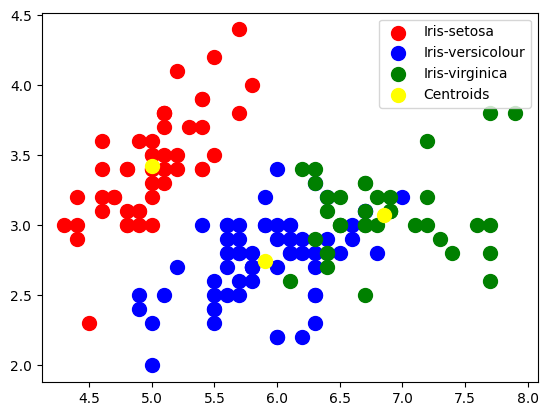

In [ ]:
#visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
